<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Patients Condition Prediction</center></h1>

### Context:
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results

### DATA DESCRIPTION:
The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

### PROJECT OBJECTIVE:
To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms

## Importing the necessary libraries

In [78]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To get diferent metric scores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1. Data Understanding:

#### DataSet1

In [79]:
#reading Normal.csv
df1=pd.read_csv('Normal.csv')


**Checking First 5 Rows**

In [80]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


**Shape of the dataset**

In [81]:
df1.shape

(100, 7)

**Observation : We have 7 columns and 100 rows**

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


**Observation : The `Class` column is of *object* type while the rest columns are numeric in nature**

#### DataSet2

In [83]:
## reading Type_H.csv
df2=pd.read_csv('Type_H.csv')

**Checking First 5 Rows**

In [84]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


**Shape of the dataset**

In [85]:
df2.shape

(60, 7)

**Observation : We have 7 columns and 60 rows**

In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


**Observation : The `Class` column is of *object* type while the rest columns are numeric in nature**

#### DataSet3

In [87]:
# reading Type_H.csv
df3=pd.read_csv('Type_S.csv')

**Checking First 5 Rows**

In [88]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


**Shape of the dataset**

In [89]:
df3.shape

(150, 7)

**Observation : We have 7 columns and 150 rows**

In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


**Observation : The `Class` column is of *object* type while the rest columns are numeric in nature**

#### Variation in ‘Class’ feature of all the 3 DaraFrames

In [91]:
## Checking class variable distribution
df1['Class'].value_counts()

Class
Normal    73
Nrmal     27
Name: count, dtype: int64

**Observations: The feature "Class" has 2 unique values Normal and Nrmal, Both represent same class**

In [92]:
df2['Class'].value_counts()

Class
Type_H    37
type_h    23
Name: count, dtype: int64

**Observations: The feature "Class" has 2 unique values Type_H and type_h, Both represent same class**

In [93]:
df3['Class'].value_counts()

Class
Type_S    133
tp_s       17
Name: count, dtype: int64

#### Observations: 
The feature "Class" has 2 unique values Type_S and tp_s, Both represent same class

### Checking columns name of DataSets

In [94]:
columns_df1 = df1.columns
columns_df2 = df2.columns
columns_df3 = df3.columns
print(columns_df1)
print(columns_df2)
print(columns_df3)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [95]:
# Compare column names using equality operator
same_columns = (columns_df1 == columns_df2) & (columns_df2 == columns_df3)
if same_columns.all():
    print("All three DataFrame have the same columns names")
else:
    print("The dataframes do not have the same column names.")


All three DataFrame have the same columns names


**Observation : All three DataFrames have same columns names**

## 2. Data Preparation and Exploration:

#### Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [96]:
df1['Class'] = df1['Class'].replace(['Normal', 'Nrmal'], 'normal')
df2['Class']=df2['Class'].replace(['Type_H','type_h'],'type_h')
df3['Class']=df3['Class'].replace(['Type_S','tp_s'],'type_s')

#### Combinning all Data Frames in to Single Data Frame

In [97]:
df = pd.concat([df1, df2, df3], axis=0)

In [98]:
df.shape

(310, 7)

**Observation : Combined Data Frame has 310 rows and 7 columns**

In [99]:
## Printing first 5 rows of combined data Frame
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [100]:
## Checking class variation in Combined Data Set
df['Class'].value_counts()

Class
type_s    150
normal    100
type_h     60
Name: count, dtype: int64

**Observations: The feature "Class" has 3 unique values typs_s,normal and type_h with Counts 150,100 and 60 respectively**

#### Checking missing values

In [101]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

**Observations: there is no missing or null values in dataframe**

#### 5 Point summary of Data Frame

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


**Observation:**

**P_incidence:**

>  **Mean and Median are nearly equal .**

> **Distribution might be normal. we have 75 % of values are less than 72 but maxiumum value is 129**

**P_tilt:**

> **Mean and median are nearly equal.**

> **Distribution might be normal.**

> **75 % of values are less than 22 but maximum value is 49 so there might be little right skewness**

**L_angle:**

> **Mean and Median are nearly equal. There is no  deviation.**

> **Distribution might be normal**

> **There might be few outliers because of the maximum value**

**S_slope:**

> **Mean and Median are nearly equal.**

> **Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.**

**P_radius:**

> **Distribution might be normal.**

> **There is no much Deviation.**

**S_Degree:**

> **Mean is greater than Median so there might be right skewness in the data .**

> **We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.**



## 3. Data Analysis:

#### HeatMap to understand Correlation

<Axes: >

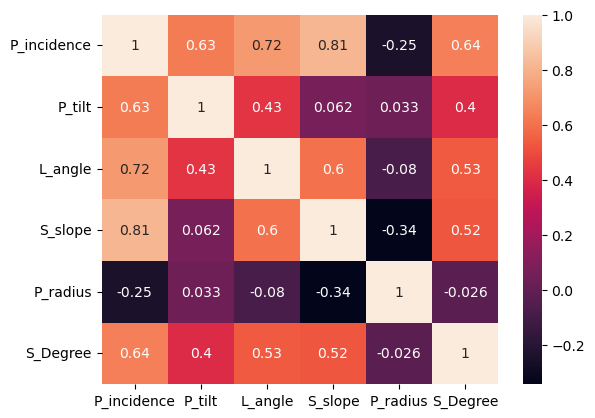

In [103]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Obervations:**
> **P_incidence has  postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle**

> **P_tilt has Higher Relationship with P_incidence and L_angle.There is no such strong Relationship with s_slope and p_radius**

> **L_angle has postive Relationship with P_incidence ,p_tilt,s_slope and s_degree. It has no strong Relationship with 
P_radius**

> **s_slope has positive Relationship with L_angle and s_degree .s_slope has negative correration with P_radius**

> **P_radius has negative correlation P_incidence and S_slope while it has no such correlation with S_Degree and P_tilt**
> **S_Degree has postive correlation with S_slope, L_angle and P_incidence . it has no such correlation with P_radius**

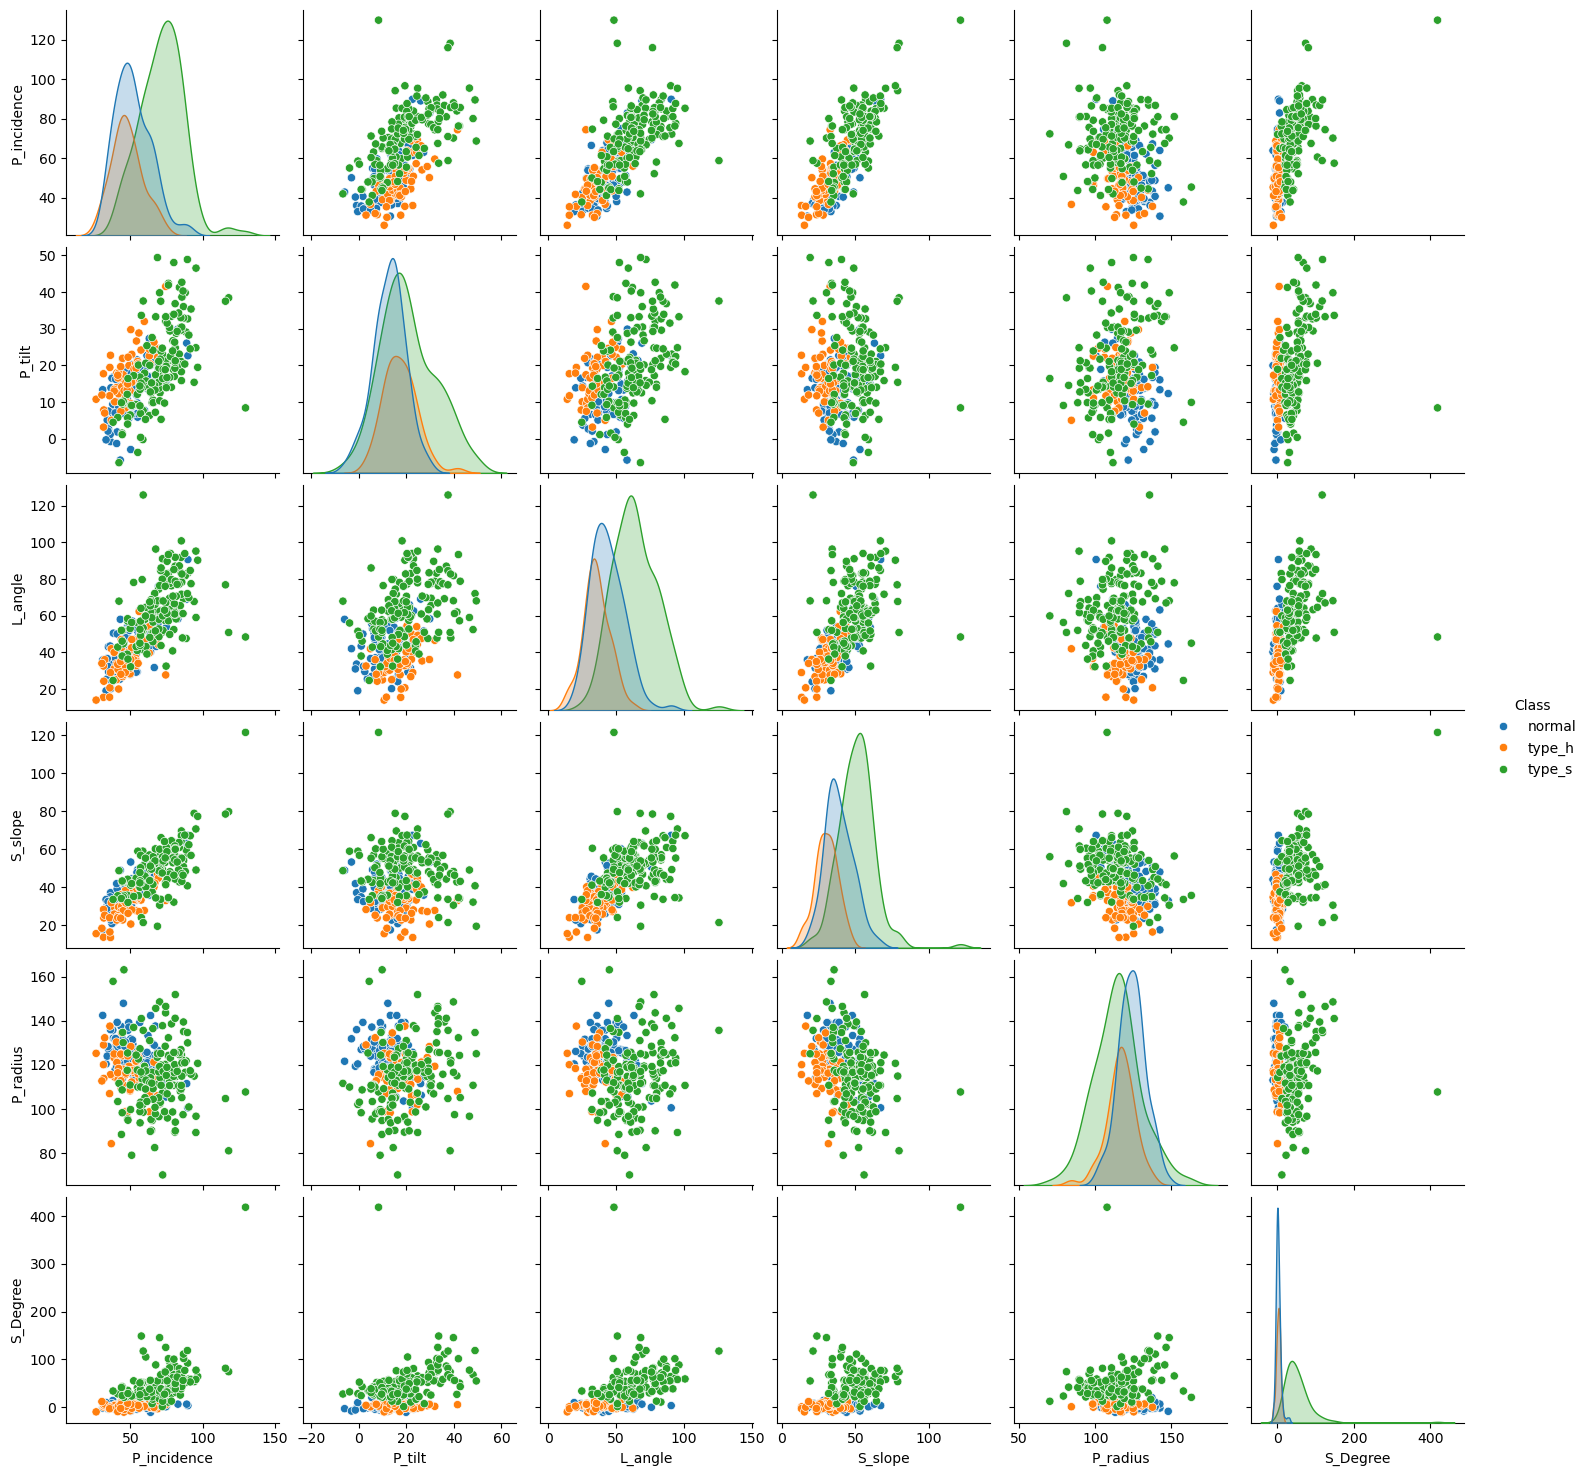

In [104]:
sns.pairplot(df,hue='Class')

**Obervations:**
> **Along the diagonal we can see distribution of variable for three claases are not same.**

> **It is evident that type_s class is more compared to other two**

> **Normal class has higher values compared to Type_H**


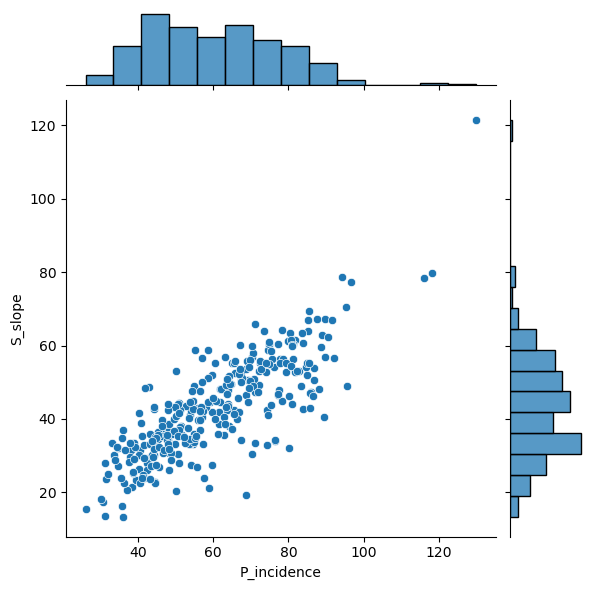

In [105]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', kind='scatter')

**Obervations:**

> **We can see from plot that  P_incidence follow near normal distribution little right skewness is due to Outlier**

> **We can see from plot that  S_slope follow near normal distribution little right skewness is due to one Outlier**

> **It is evident that P_incidence and S_slope are positively  correlated**


#### Distribution and outlier analysis of numerical variables 

In [106]:
## Common function to draw histogram and barplot for different variable
def histboxplot(df,col_name):
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = col_name, data=df,  orient='h' , ax=axes[1],color='Green')
    sns.histplot(df[col_name],  ax=axes[0],color='Green',kde=True)
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()

**P_incidence**

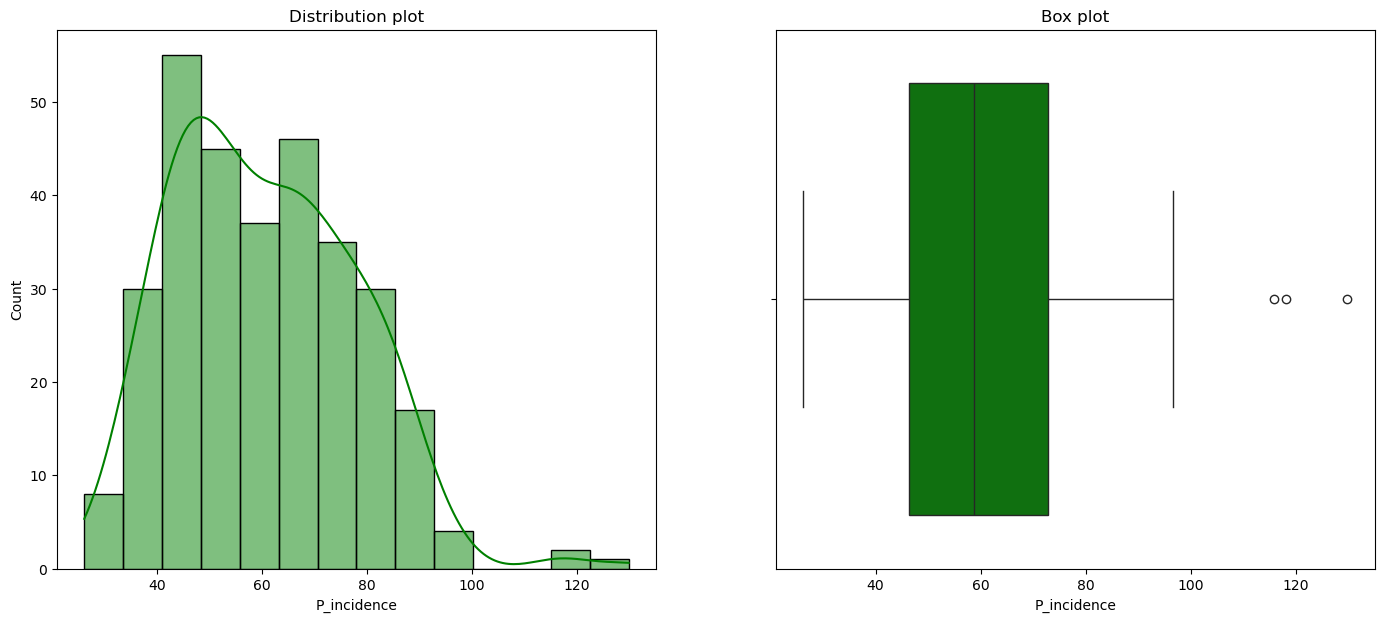

In [107]:
histboxplot(df,'P_incidence')

> **Normality is maintained with very less extreme values**

> **We can see three outliers exists in the column**

**P_tilt**

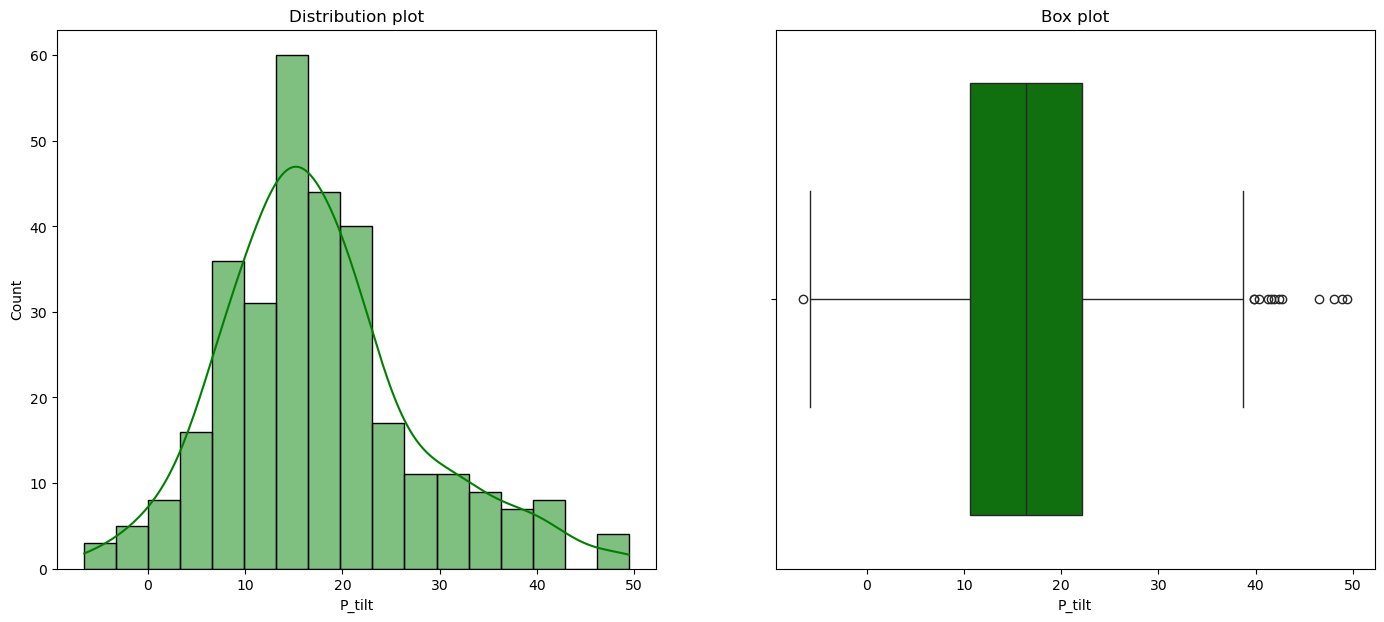

In [108]:
histboxplot(df,'P_tilt')

**Observation:**

> **Data is Normally distributed and we can see one peakness in the center**

> **It is has little skewness towards right side**

> **We can see one outlier in negative end and few outliers in positive end.**

**L_angle**

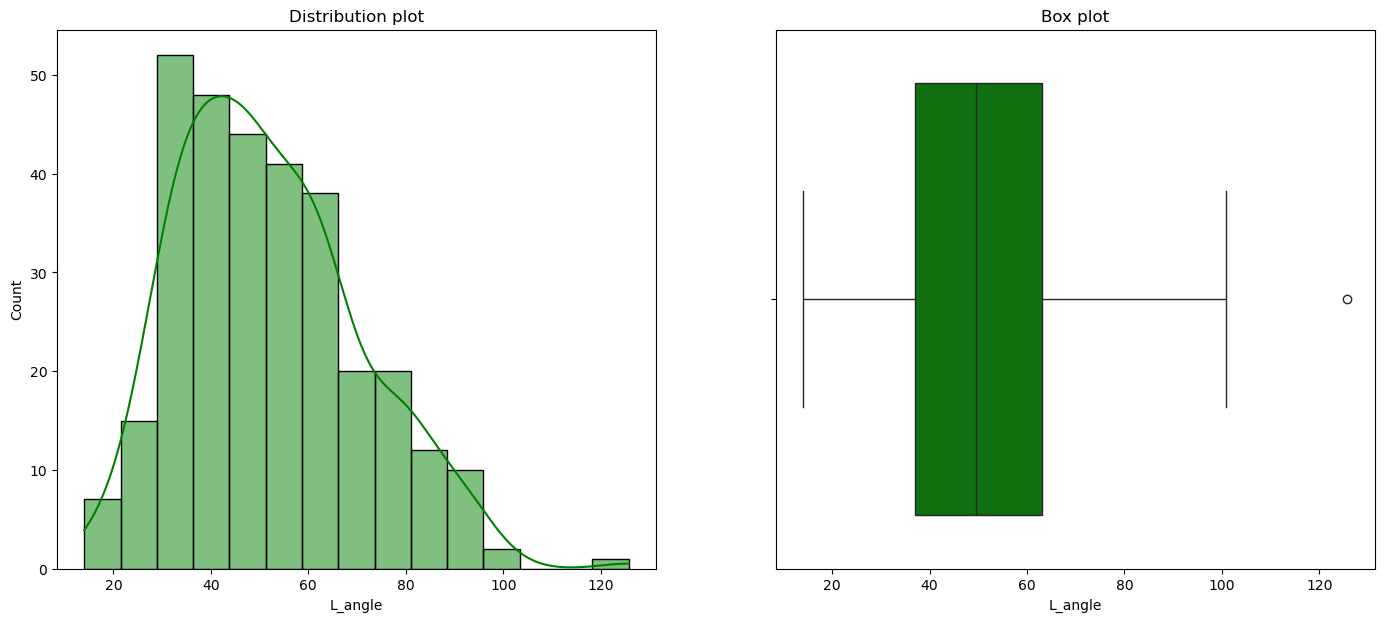

In [109]:
histboxplot(df,'L_angle')

**Observation:**

> **It is Normally distributed**

> **Little right skewness because of one outlier**

**S_slope**

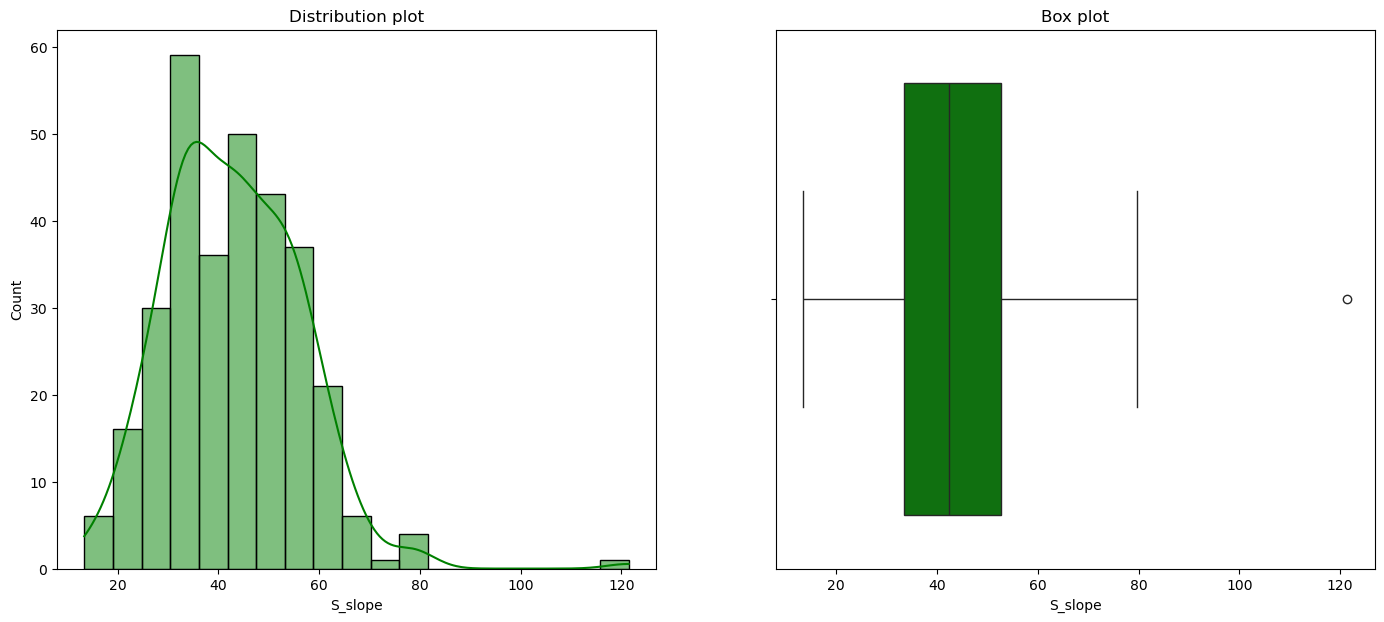

In [110]:
histboxplot(df,'S_slope')

**Observation:**

> **It is Normally distributed**

> **Little right skewness because of one outlier**

**P_radius**

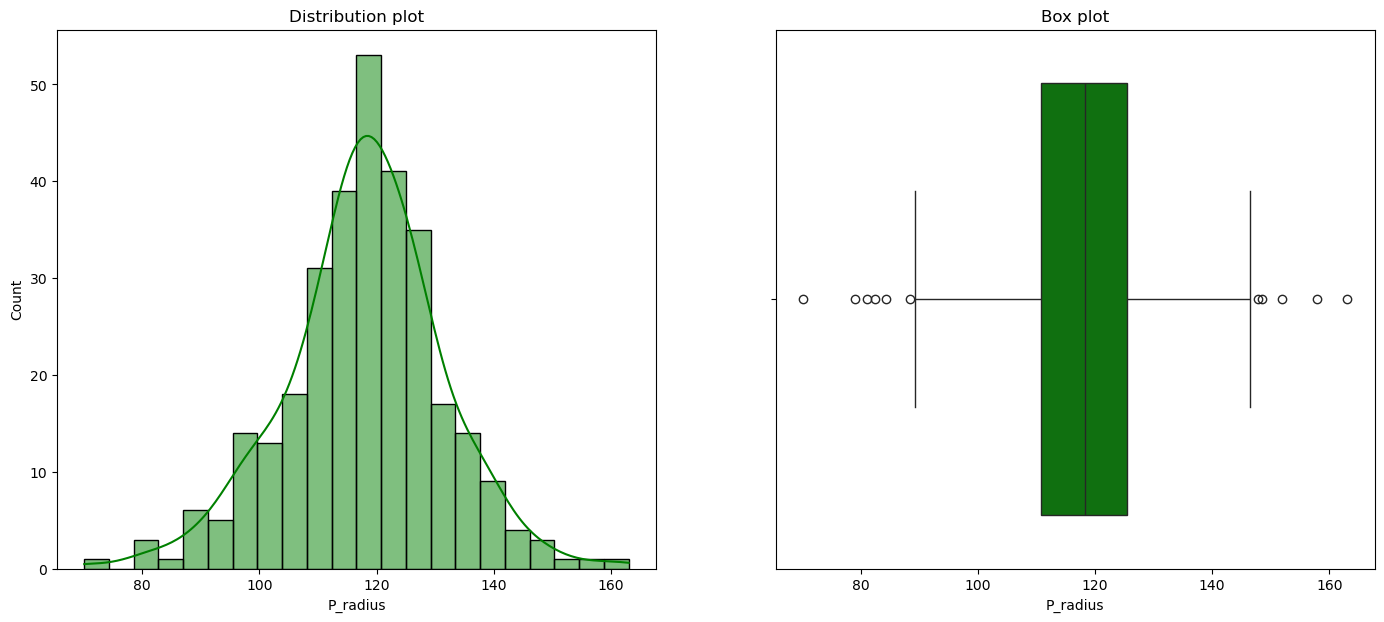

In [111]:
histboxplot(df,'P_radius')

**Observation:**

> **Data is normally distributed**

> **We can see outliers at both the ends.**

**S_Degree**

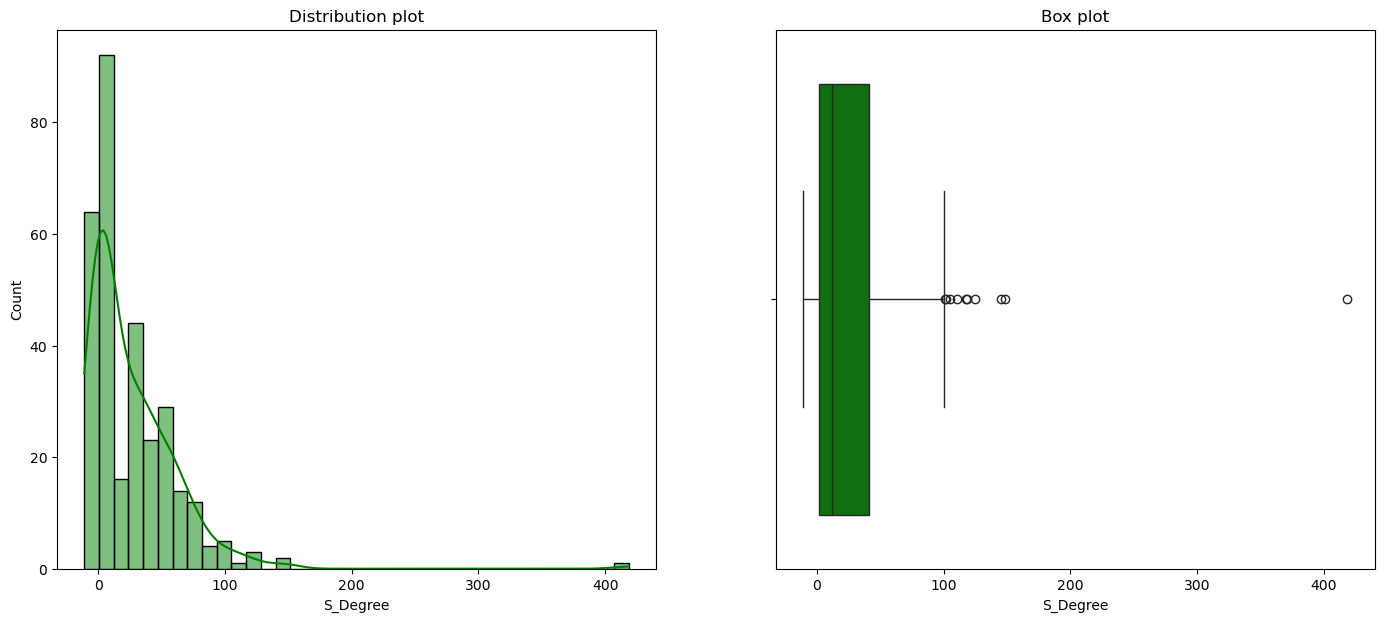

In [112]:
histboxplot(df,'S_Degree')

**Observation:**

> **There is Positive Skewness in the data**

> **Hugely affected by Outliers**

<Axes: xlabel='Class', ylabel='count'>

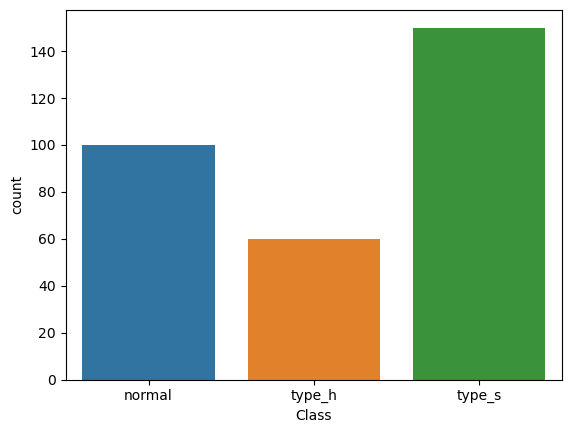

In [113]:
sns.countplot(data=df,x='Class',hue='Class')

**Obervation**
> **We can distribution of different classes**

> **type_s is highest count followed by normal and type_h**

**Class vs P_incidence**

<Axes: xlabel='Class', ylabel='P_incidence'>

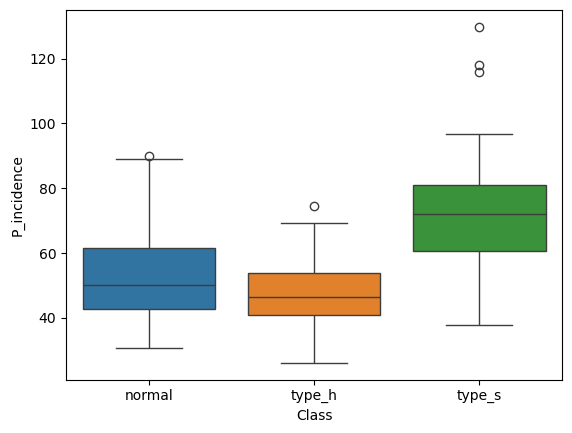

In [114]:
sns.boxplot(x='Class', y='P_incidence', data= df,hue='Class')

**Obervations:**

> **P_Incidence Value is larger for Type_S Class. We can see some extreme values as well**

> **Normal Value is slightly higher than Type_H**

**Class vs P_tilt**

<Axes: xlabel='Class', ylabel='P_tilt'>

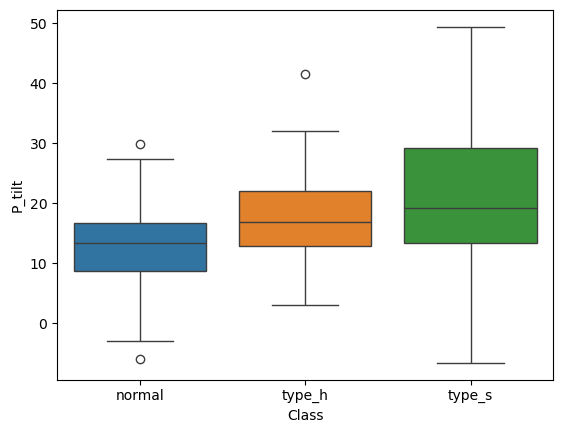

In [115]:
sns.boxplot(x='Class', y='P_tilt', data= df,hue='Class')

**Obervations:**

> **Mean of Type_S is slightly higher than rest two**

> **Few cases Normal and Type_H also has huge values**

**Class vs L_angle**

<Axes: xlabel='Class', ylabel='L_angle'>

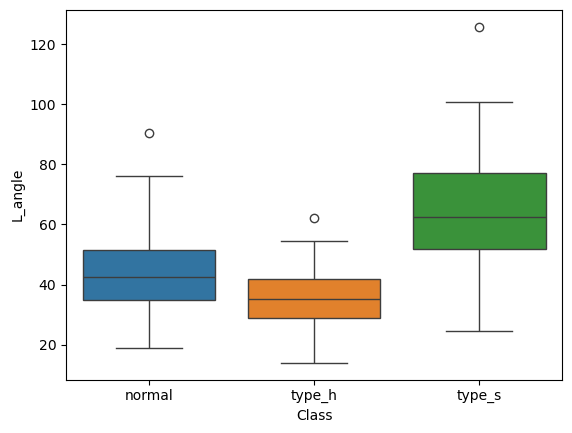

In [116]:
sns.boxplot(x='Class', y='L_angle', data= df,hue='Class')

**Observations:**

> **L_Angle has higher value for Type_S Class**

>**We can see Normal class has higher values compared to type_H class**

> **Each class contains one outlier**

**Class vs S_slope**

<Axes: xlabel='Class', ylabel='S_slope'>

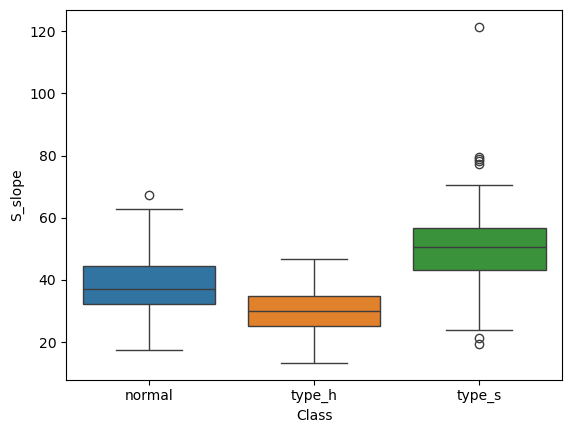

In [117]:
sns.boxplot(x='Class', y='S_slope', data= df,hue='Class')

**Observations:**

> **S_slope has huge values for Type_S class**

>**Normal class has high s_slope compared to Type_H**



**Class vs P_radius**

<Axes: xlabel='Class', ylabel='P_radius'>

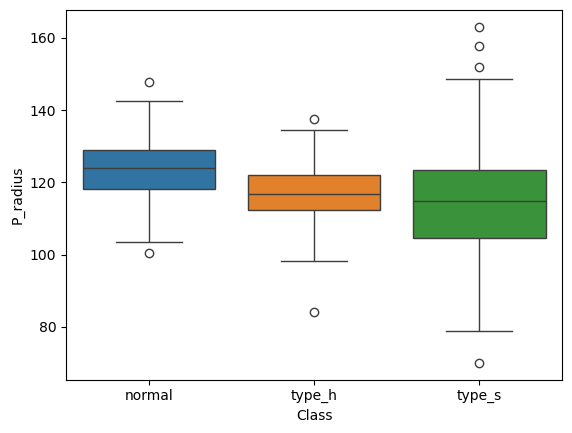

In [118]:
sns.boxplot(x='Class', y='P_radius', data= df,hue='Class')

**Obervation**:

> **We can see P_radius value is more for Normal Class**

> **There is some extreme values for Type_s class**

> **All classes has higher and lower Value**


**Class vs S_Degree**

<Axes: xlabel='Class', ylabel='S_Degree'>

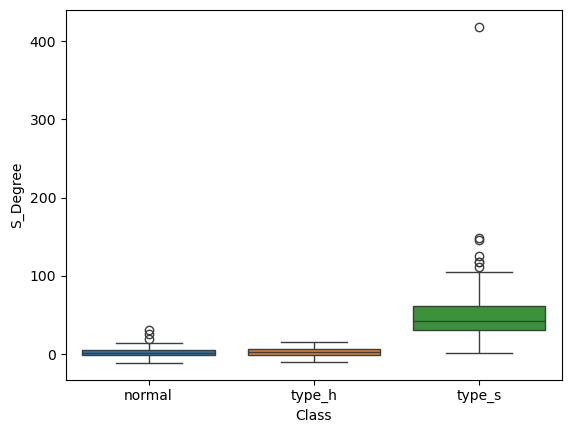

In [119]:
sns.boxplot(x='Class', y='S_Degree', data= df,hue='Class')

**Observations:**

> **S_Degree has extreme values for type_S Class**

>**Few Normal class also has huge values for S_Degree**


### Outlier Detection

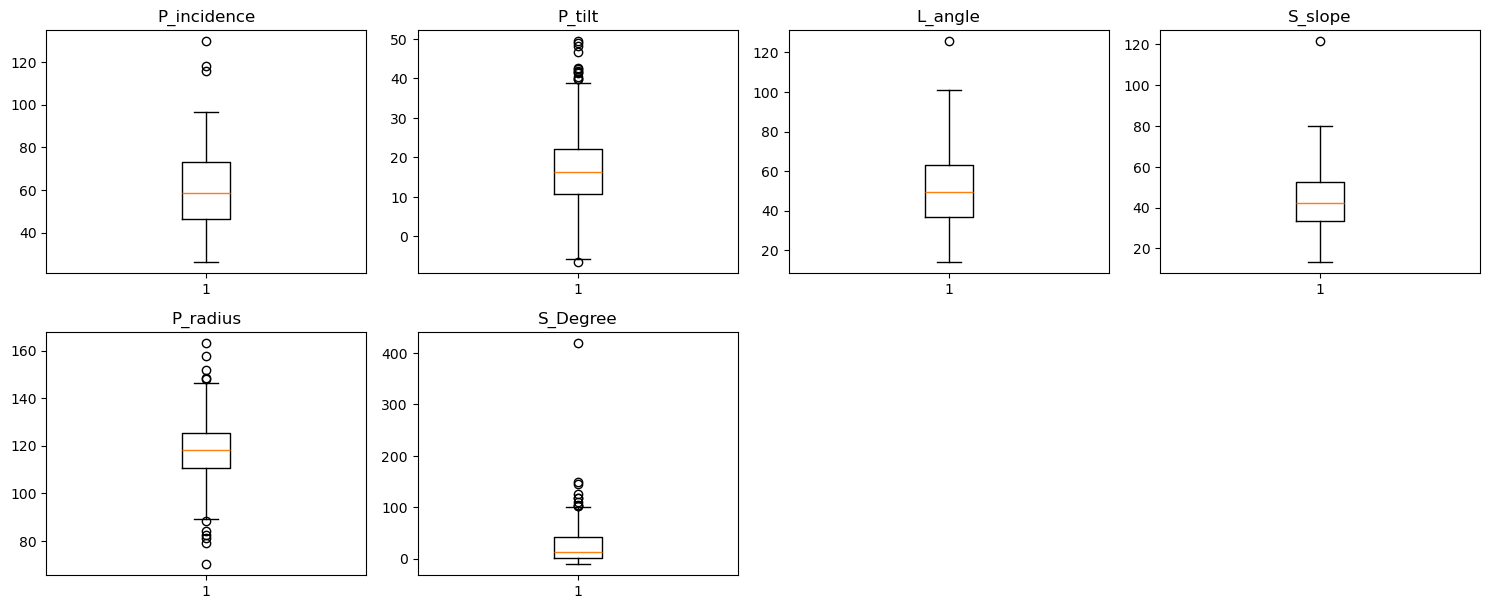

In [120]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Obervation:**

> **P_incidence has upper outliers**

> **P_tilt has upper outliers and one lower outlier**

> **L_angle has one upper outlier**

> **S_slope has one upper outlier**

> **P_radius has upper and lower outliers**

> **S_Degree  has upper outliers**

### Outlier treatment

In [121]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [122]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

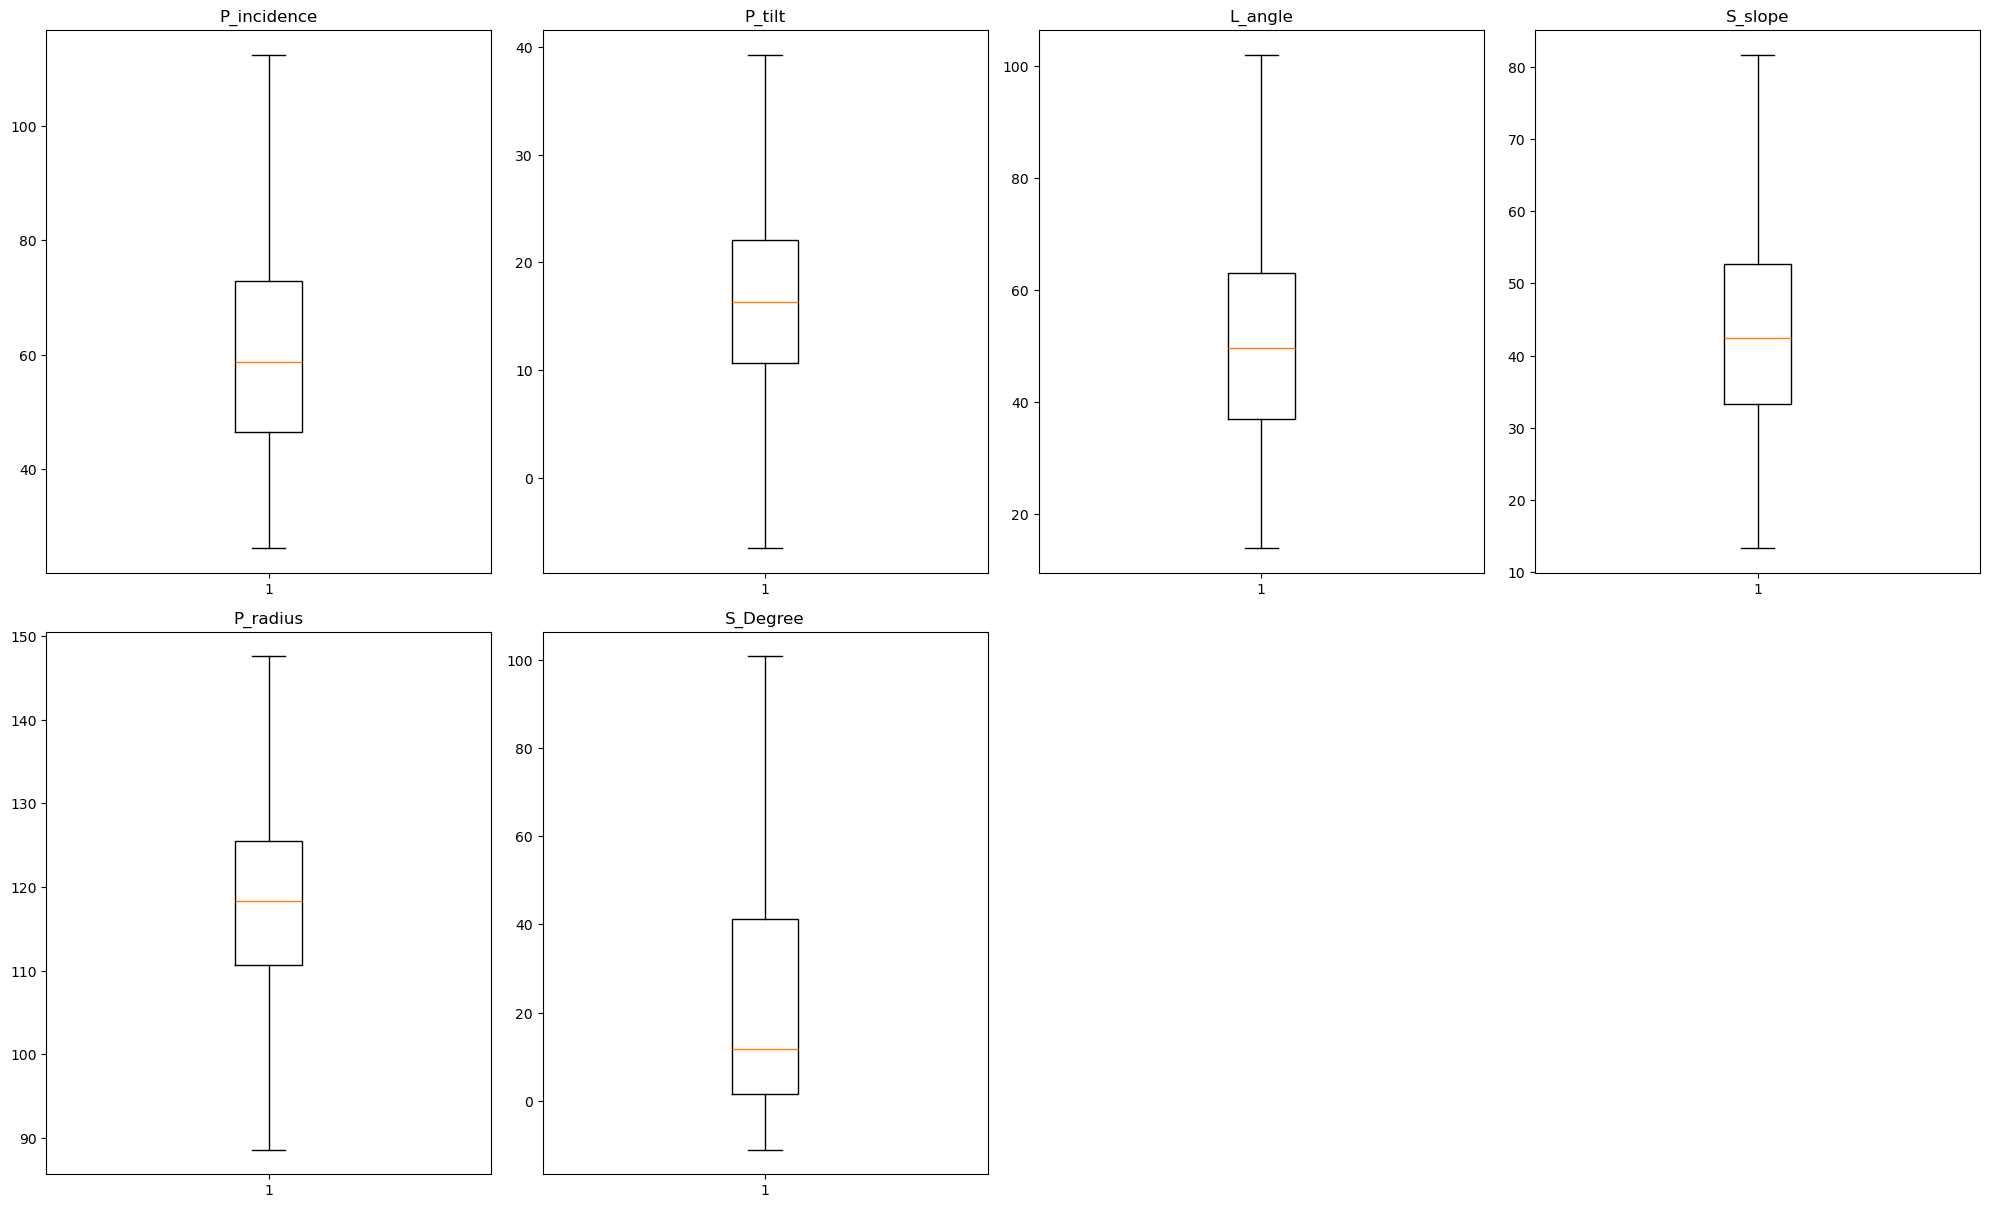

In [123]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**
> **We can see now there is no outliers**

## 4.  Model Building:

In [124]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Class')
y=df['Class'] #target

In [125]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.411958,16.945195,26.147921,46.430294,58.691038,72.877696,112.548797
P_tilt,310.0,17.377847,9.578631,-6.512919,10.667069,16.357689,22.120395,39.300383
L_angle,310.0,51.854341,18.295598,14.000000,37.000000,49.562398,63.000000,102.000000
S_slope,310.0,42.825732,12.848977,13.366931,33.347122,42.404912,52.695888,81.719038
P_radius,310.0,117.969164,12.635133,88.571479,110.709196,118.268178,125.467674,147.605392
S_Degree,310.0,24.735864,28.812259,-11.058179,1.603727,11.767934,41.287352,100.812790


#### Normalizing the numerical variables

In [126]:
X_Scaled=X.apply(zscore)

In [127]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,2.750488e-16,1.001617,-2.025320,-0.826445,-0.101722,0.736840,3.081767
P_tilt,310.0,1.604451e-16,1.001617,-2.498206,-0.701732,-0.106676,0.495918,2.292392
L_angle,310.0,-1.833659e-16,1.001617,-2.072386,-0.813221,-0.125475,0.610184,2.745291
S_slope,310.0,-4.125732e-16,1.001617,-2.296403,-0.738886,-0.032804,0.769409,3.031851
P_radius,310.0,2.979695e-16,1.001617,-2.330424,-0.575515,0.023704,0.594425,2.349334
S_Degree,310.0,1.375244e-16,1.001617,-1.244328,-0.804156,-0.450811,0.575389,2.644705


#### Train Test Split

In [128]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.20, random_state=10)

#### Model Evaluation

In [129]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target,avg):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average=avg)  # to compute Recall
    precision = precision_score(target, pred,average=avg)  # to compute Precision
    f1 = f1_score(target, pred,average=avg)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [130]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3, 3)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### K- Nearest Neighbor

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 5 and gradually exploring other values to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

#### K=5

In [131]:
KNN_base = KNeighborsClassifier(n_neighbors= 3) #Building knn with 3 neighbors

In [132]:
KNN_base.fit(X_train, y_train)
predicted_labels = KNN_base.predict(X_test)

#### Performance Metrics of Training Data

In [133]:
knn_perf_train_3 = model_performance_classification_sklearn(
    KNN_base, X_train, y_train,"macro"
)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.931452,0.924353,0.920435,0.922352


#### Performance Metrics of  Test Data

<Axes: >

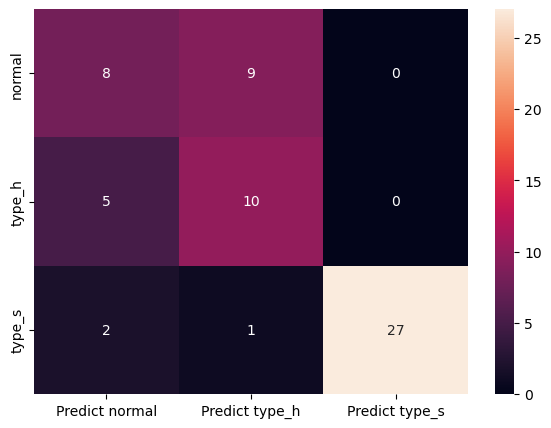

In [134]:
cm=confusion_matrix(y_test, predicted_labels, labels=["normal","type_h","type_s"])

df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_h","type_s"]],
                  columns = [i for i in ["Predict normal","Predict type_h","Predict type_s"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [135]:
knn_perf_test_3 = model_performance_classification_sklearn(
    KNN_base, X_test, y_test,"macro"
)
knn_perf_test_3

,Accuracy,Recall,Precision,F1
0,0.725806,0.679085,0.677778,0.672932


In [136]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      normal       0.53      0.47      0.50        17
      type_h       0.50      0.67      0.57        15
      type_s       1.00      0.90      0.95        30

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.75      0.73      0.73        62



**Obervation**
**We can see performance of test data is low as compared to training data**

### Performance Improvement

In [137]:
## Try with different number of neighbour and compare peformance
recall_scores_train = []
recall_scores_test = []
f1_scores_train = []
f1_scores_test = []
accuracy_scores_train=[]
accuracy_scores_test=[]
neighbors = [i for i in range(1,51) if i%2 != 0]
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k ) 
    KNN.fit(X_train, y_train)
      # predict on train and test
    y_pred_train = KNN.predict(X_train)
    y_pred_test = KNN.predict(X_test)
    
    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train,average="macro")
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test,average="macro")
    recall_scores_test.append(scores_test)
    f1_score_train = f1_score(y_train, y_pred_train,average="macro")
    f1_scores_train.append(f1_score_train)
    f1_score_test = f1_score(y_test, y_pred_test,average="macro")
    f1_scores_test.append(f1_score_test)
    
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    accuracy_scores_train.append(f1_score_train)
    accuracy_score_test = accuracy_score(y_test, y_pred_test)
    accuracy_scores_test.append(f1_score_test)
    

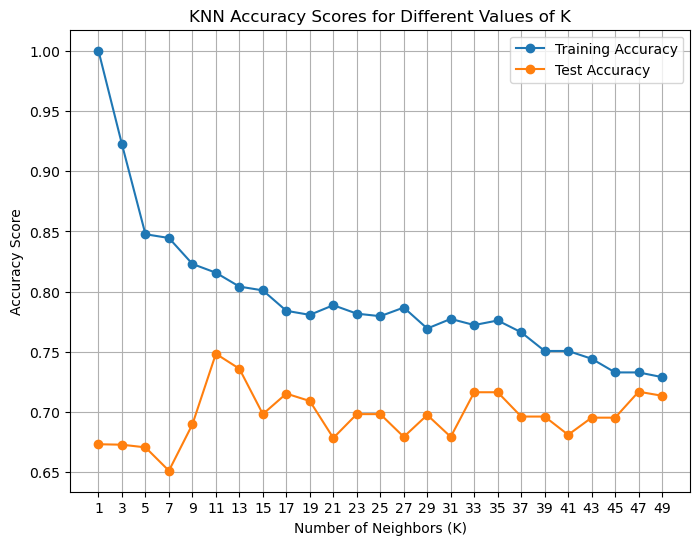

In [138]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracy_scores_train, label='Training Accuracy', marker='o')
plt.plot(neighbors, accuracy_scores_test, label='Test Accuracy', marker='o')
plt.title('KNN Accuracy Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

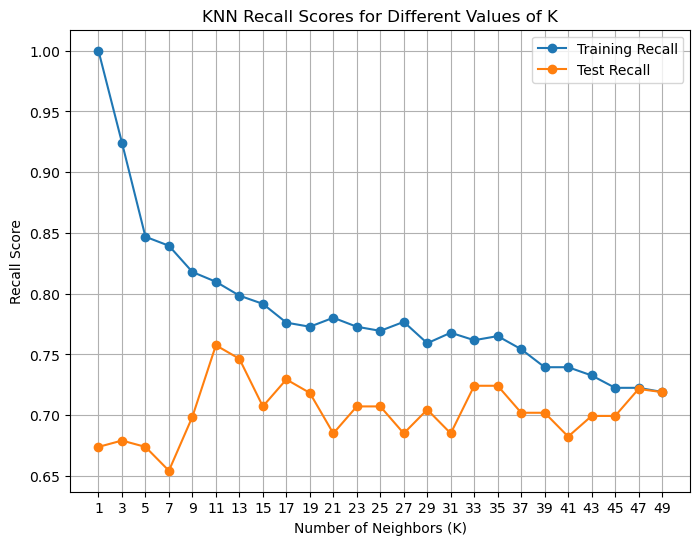

In [139]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

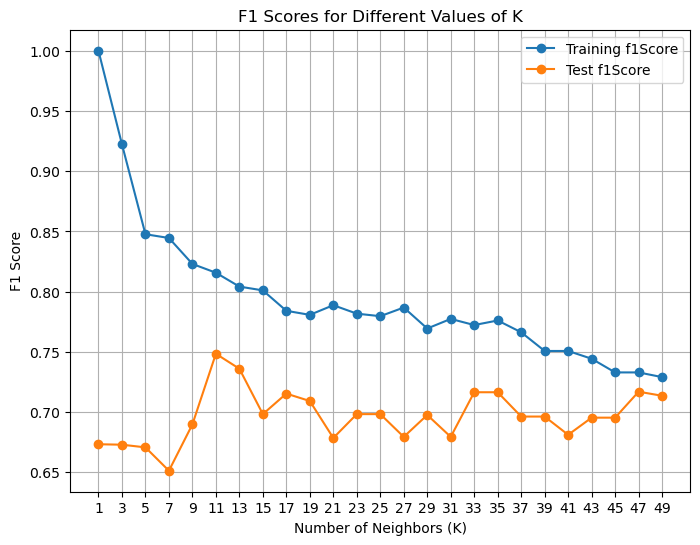

In [140]:
# Plot F1 scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, f1_scores_train, label='Training f1Score', marker='o')
plt.plot(neighbors, f1_scores_test, label='Test f1Score', marker='o')
plt.title('F1 Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [141]:
KNN_11 = KNeighborsClassifier(n_neighbors=11) #Building knn with 11 neighbors
KNN_11.fit(X_train, y_train)
predicted_labels = KNN_11.predict(X_test)
print('Accuracy on Training data for k {} is {}:'.format(i,KNN_11.score(X_train, y_train)))
print('Accuracy on Test data for k {} is {}:'.format(i,KNN_11.score(X_test, y_test)))
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 5 is 0.8467741935483871:
Accuracy on Test data for k 5 is 0.7741935483870968:
classification  Matrix:
               precision    recall  f1-score   support

      normal       0.60      0.71      0.65        17
      type_h       0.65      0.73      0.69        15
      type_s       1.00      0.83      0.91        30

    accuracy                           0.77        62
   macro avg       0.75      0.76      0.75        62
weighted avg       0.80      0.77      0.78        62



In [142]:
knn_perf_test_11 = model_performance_classification_sklearn(
    KNN_11, X_test, y_test,"macro"
)
knn_perf_test_11

,Accuracy,Recall,Precision,F1
0,0.774194,0.757516,0.74902,0.748413


### Performance of base model

In [147]:
predicted_labels_base=KNN_base.predict(X_test)
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      normal       0.53      0.47      0.50        17
      type_h       0.50      0.67      0.57        15
      type_s       1.00      0.90      0.95        30

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.75      0.73      0.73        62



In [148]:
knn_perf_test_3 = model_performance_classification_sklearn(
    KNN_base, X_test, y_test,"macro"
)
knn_perf_test_3


,Accuracy,Recall,Precision,F1
0,0.725806,0.679085,0.677778,0.672932


**Observation:**

> **We can see from perofmance matrix that performance has been improved from base model**

> **Neighbour count 11 provided optimized performance**

> **Accuracy has been improved +5%.**

> **Recall has been improved  +8%.**

> **Precision has been improved by +8% .**